<a href="https://colab.research.google.com/github/mueller14003/cse480-notebooks/blob/master/08_2_Ponder_and_Prove_Turing_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ponder and Prove Turing Machines
## Due: Saturday, 27 February 2021, 11:59 pm

In [26]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty',
                   '../Jove',      '../Jove/jove']

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.Def_TM     import *
from jove.Def_md2mc  import *
from jove.DotBashers import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## TODO Study Examples

In the folders

Jove/For_CS3100_Fall2020/17_DTMs_and_NDTMs

and 

Jove/For_CS3100_Fall2020/18_More_TM_Exs

you will find many examples of Deterministic Turing Machines, and Nondeterministic Turing Machines. Study these carefully!

## TODO Write a Summary

Describe what you learned about TMs of both varieties.

What I learned about DTMs:
* Need markers to indicate separate strings/parameters.
* b
* c

What I learned about NDTMs:
* Don't need markers between strings/parameters.
* b
* c

## TODO Create a DTM to Delete a Character

This task is to delete a character from the tape string. Deleting the current symbol means transforming the tape from $x\sigma y$ to $xy$ where $\sigma$ is any symbol, including a blank, and $y$ is a string of nonblank symbols. Assume the input alphabet is $\{a, b\}$.

HINT: Use a couple of states (labeled $q_a$ and $q_b$, say) for your TM to remember a symbol between the time it is erased and the time it is copied in the next square to the left. (The complete DTM requires about 6 states total, with 12 transitions.)


Generating LALR tables


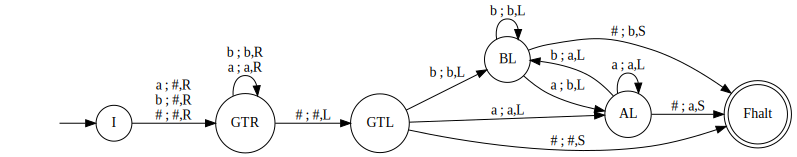

In [27]:
# DTM to delete a character
dtmDelChar = md2mc('''TM
!!cs   sr sw  md   ns
  I   : a; #, R -> GTR
  I   : b; #, R -> GTR
  I   : #; #, R -> GTR

!!GTR means "go to right"
  GTR : a; a, R -> GTR
  GTR : b; b, R -> GTR
  GTR : #; #, L -> GTL

!!GTL means "go to left"
  GTL : a; a, L -> AL
  GTL : b; b, L -> BL
  GTL : #; #, S -> Fhalt

!!AL means "a left"
  AL  : a; a, L -> AL
  AL  : b; a, L -> BL
  AL  : #; a, S -> Fhalt

!!BL means "b left"
  BL  : a; b, L -> AL
  BL  : b; b, L -> BL
  BL  : #; b, S -> Fhalt
''')
DO_dtmDelChar = dotObj_tm(dtmDelChar, FuseEdges=True)
DO_dtmDelChar.render('dtmDelChar')
DO_dtmDelChar

## TODO Create a DTM to Insert a Character

This task is the opposite of the first one, namely, to insert a character into the tape string. Inserting the symbol $\sigma$ is done virtually the same way as deleting, except that the single pass goes from left to right, symbols are moved to the right instead of to the left, and the move that starts things off writes $\sigma$ instead of a blank.


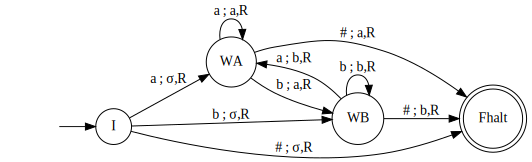

In [28]:
# DTM to insert a character
dtmInsChar = md2mc('''TM
!!cs   sr sw  md   ns
  I   : a; σ, R -> WA
  I   : b; σ, R -> WB
  I   : #; σ, R -> Fhalt

!!WA means "write a"
  WA  : a; a, R -> WA
  WA  : b; a, R -> WB
  WA  : #; a, R -> Fhalt

!!WB means "write b"
  WB  : a; b, R -> WA
  WB  : b; b, R -> WB
  WB  : #; b, R -> Fhalt

''')
DO_dtmInsChar = dotObj_tm(dtmInsChar, FuseEdges=True)
DO_dtmInsChar.render('dtmInsChar')
DO_dtmInsChar

## TODO Create a DTM to Copy a String

Let $\sqcup$ represent the blank symbol. A *Copy* DTM starts with tape $\sqcup\ x$ where $x$ is a string of nonblank symbols, and ends up with $\sqcup\ x \sqcup x$. Again, assume the input alphabet is $\{a, b\}$.

HINT: This DTM requires about 10 states, and not quite double that many transitions.

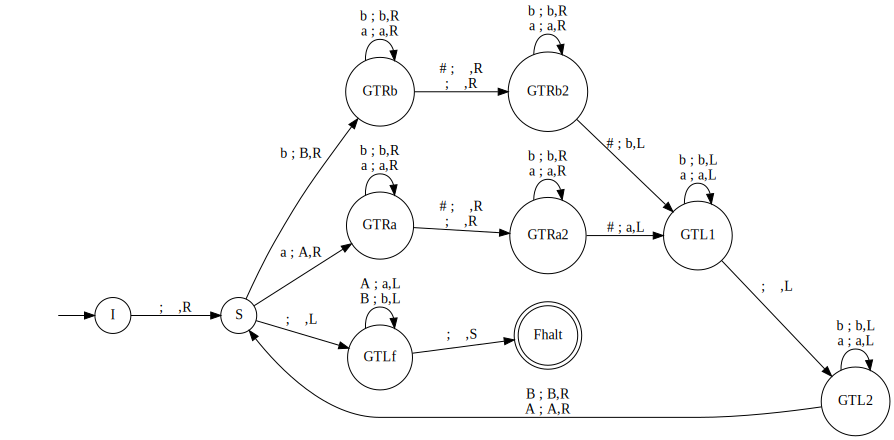

In [29]:
# DTM to copy a string
## ⊔ square cup
dtmCpyStr = md2mc('''TM
!!cs   sr sw  md   ns
  I     : ⊔; ⊔, R -> S

!!S reads the tape and goes to the next corresponding node.
  S     : a; A, R -> GTRa
  S     : b; B, R -> GTRb
  S     : ⊔; ⊔, L -> GTLf

!!GTRa goes right until it hits an empty symbol or a blank symbol. 
!!It will overwrite an empty stmbol to a blank symbol if necessary.
!!It will then move on to GTRa2.
  GTRa  : a; a, R -> GTRa
  GTRa  : b; b, R -> GTRa
  GTRa  : #; ⊔, R -> GTRa2
  GTRa  : ⊔; ⊔, R -> GTRa2

!!GTRa2 goes right until it hits an empty symbol. 
!!It will then overwrite the empty symbol with an 'a'.
  GTRa2 : a; a, R -> GTRa2
  GTRa2 : b; b, R -> GTRa2
  GTRa2 : #; a, L -> GTL1

!!GTRb goes right until it hits an empty symbol or a blank symbol. 
!!It will overwrite an empty stmbol to a blank symbol if necessary.
!!It will then move on to GTRb2.
  GTRb  : a; a, R -> GTRb
  GTRb  : b; b, R -> GTRb
  GTRb  : #; ⊔, R -> GTRb2
  GTRb  : ⊔; ⊔, R -> GTRb2

!!GTRb2 goes right until it hits an empty symbol. 
!!It will then overwrite the empty symbol with a 'b'.
  GTRb2 : a; a, R -> GTRb2
  GTRb2 : b; b, R -> GTRb2
  GTRb2 : #; b, L -> GTL1

!!GTL1 is going left until it hits the ⊔ for the copy of the string.
  GTL1  : a; a, L -> GTL1
  GTL1  : b; b, L -> GTL1
  GTL1  : ⊔; ⊔, L -> GTL2

!!GTL2 is going left the second time to copy the next symbol.
  GTL2  : a; a, L -> GTL2
  GTL2  : b; b, L -> GTL2
  GTL2  : A; A, R -> S
  GTL2  : B; B, R -> S

!!GTLf means "go to left final"
  GTLf  : A; a, L -> GTLf
  GTLf  : B; b, L -> GTLf
  GTLf  : ⊔; ⊔, S -> Fhalt

''')
DO_dtmCpyStr = dotObj_tm(dtmCpyStr, FuseEdges=True)
DO_dtmCpyStr.render('dtmCpyStr')
DO_dtmCpyStr

## TODO Refresh Your Knowledge of the 3x+1 Conjecture

The code on page 200 does the 3x+1 Conjecture testing recursively:

In [30]:
def tep1(x):
    if (x==1):
        return 1
    elif (x%2 == 0):
        return tep1(x/2)
    else:
        return tep1(3*x+1)

print(tep1(3))
print(tep1(191))
print(tep1(19192949297080))
print(tep1(191929492970809272397923472398492839482))
print(tep1(191929492970809272397923472398492839482938492))

1
1
1
1
1


Two Python techniques --- "memoizing" and "listifying" --- make for faster code:

In [31]:
def memoize(func):
    results = {}
    def inner(i):
        if not i in results:
            results[i] = func(i)
        return results[i]
    return inner

def listify(func):
    def inner(x):
        return list(func(x))
    return inner

@memoize
def tep1(x):
    return 1 if x == 2 else tep1(x/2) if x%2 == 0 else tep1(3*x+1)

@listify
def tepmany(x):
    for i in range(1, x+1):
        yield tep1(i)

print(max(tepmany(100000)))

1


# TODO Modify a NON-Trivial Turing Machine Program

The Turing machine program on page 202 performs the continuing 3x+1 transformation on an input that is a binary number. So for example if the
initial tape has

$11$

which is the binary representation of the decimal number three, the final tape
will have

$1$

on it.

Modify the program so that a trace of all intermediate results appears on the output tape, e.g.:

$11*1010*101*10000*1000*100*10*1$

which separates with a star the binary representations of the numbers in the
continuing 3x+1 transformation from 3 to 10 to 5 to 16 to 8 to 4 to 2 to 1.


## 3x+1 Conjecture Python

In [32]:
collatz = lambda n: 1 if n==1 else collatz(3*n+1) if n%2 else collatz(n/2)

In [33]:
collatz(3)

1

In [34]:
collatz(121)

1

In [35]:
collatz(123409827364509827387)

1

In [36]:
collatz(45978623485293845798213490871263497862345)

1

## 3x+1 With Steps Python

In [37]:
def collatz_with_steps(n):
  n = int(n)
  if n==1:
    return 1
  if n%2:
    print(f"n = {n}\n3*{n}+1 = {int(3*n+1)}\n")
    return collatz_with_steps(3*n+1)
  else:
    print(f"n = {n}\n{n}/2 = {int(n/2)}\n")
    return collatz_with_steps(n/2)

In [38]:
collatz_with_steps(3)

n = 3
3*3+1 = 10

n = 10
10/2 = 5

n = 5
3*5+1 = 16

n = 16
16/2 = 8

n = 8
8/2 = 4

n = 4
4/2 = 2

n = 2
2/2 = 1



1

## 3x+1 Turing Machine

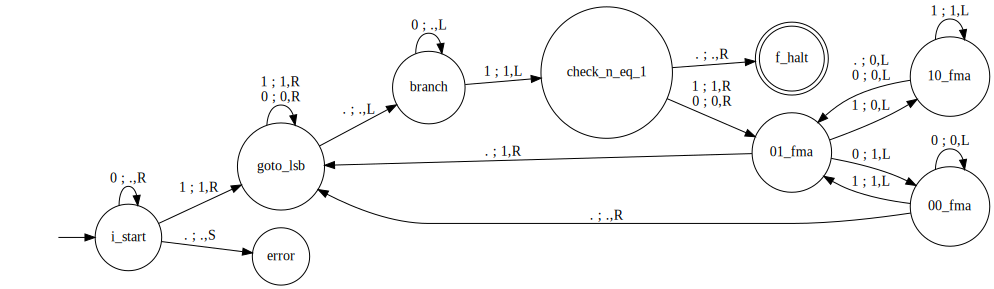

In [39]:
dtm3xp1 = md2mc('''
TM!! 
i_start: 0;., R -> i_start !! erase this zero and try to find more 
i_start: 1; 1, R -> goto_lsb!! we have a proper number, go to the lsb 
i_start:.;., S -> error!! error on no input or input == 0 
goto_lsb: 0; 0,R | 1; 1,R -> goto_lsb!! scan off the right edge of the number 
goto_lsb:.; .,L -> branch!! take a step back to be on the lsb and start branch 
branch: 0; .,L -> branch!! number is even, divide by two and re-branch 
branch: 1; 1,L -> check_n_eq_1!! number is odd, check if it is 1 
check_n_eq_1: 0; 0,R | 1; 1,R -> 01_fma!! number wasn’t 1, goto 3n+1 
check_n_eq_1:.; .,R -> f_halt!! number was 1, halt 
!! carrying 0 we see a 0 so write 0 and carry 0 forward 
00_fma: 0; 0,L -> 00_fma 
!! carrying 0 we see a 1 (times 3 is 11) so write 1 and carry 1 forward 
00_fma: 1; 1,L -> 01_fma 
!! reached the end of the number, go back to the start 
00_fma:.; .,R -> goto_lsb 
!! carrying 1 we see a 0 so write 1 and carry 0 forward 
01_fma: 0; 1,L -> 00_fma 
!! carrying 1 we see a 1 (times 3 is 11, plus our carry is 100) so write 0 and carry 10 forward 
01_fma: 1; 0,L -> 10_fma 
!! reached the end of the number, write our 1 and go back to the start 
01_fma:.; 1,R -> goto_lsb 
!! carrying 10 we see a 0, so write 0 and carry 1 forward 
10_fma: 0; 0,L -> 01_fma 
!! carrying 10 we see a 1 (times 3 is 11, plus our carry is 101), so write 1 and carry 10 forward 
10_fma: 1; 1,L -> 10_fma 
!! reached the end of the number, write a 0 from our 10 and carry 1 
10_fma:.; 0,L -> 01_fma
''')
DO_dtm3xp1 = dotObj_tm(dtm3xp1, FuseEdges=True)
DO_dtm3xp1.render('dtm3xp1')
DO_dtm3xp1